#1. Dataset: CIC IDS2017



##1.1 Preparing Libraries



In [ ]:
model_performance_cic_ids = {}
print("Created an empty dictionary 'model_performance_cic_ids' for storing model performance.")

Created an empty dictionary 'model_performance_cic_ids' for storing model performance.


In [ ]:
print("Installing 'opendatasets'...")
!pip install -q opendatasets
print("Installation complete.")

Installing 'opendatasets'...
Installation complete.


## 1.2 Loading the Dataset CIC IDS2017

In [ ]:
import pandas as pd
import opendatasets as od
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

print("--- Reloading and preprocessing CIC IDS2017 dataset ---")

# 1. Download (will skip if already present)
dataset_url = "https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset"
od.download(dataset_url)

# 2. Configuration des fichiers
base_dir = './network-intrusion-dataset'
files_config = {
    'Friday-DDoS': 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-PortScan': 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Wednesday-DoS': 'Wednesday-workingHours.pcap_ISCX.csv',
    'Tuesday-BruteForce': 'Tuesday-WorkingHours.pcap_ISCX.csv'
}

dataframes = []
print("🚀 Chargement et harmonisation des données...")

for key, filename in files_config.items():
    path = os.path.join(base_dir, filename)
    if os.path.exists(path):
        print(f" -> Traitement de {key}...")
        df_temp = pd.read_csv(path)
        df_temp.columns = df_temp.columns.str.strip()

        df_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
        df_temp.dropna(inplace=True)

        df_benign = df_temp[df_temp['Label'] == 'BENIGN']
        df_attack = df_temp[df_temp['Label'] != 'BENIGN']

        if len(df_benign) > 10000:
            df_benign = df_benign.sample(n=10000, random_state=42)

        dataframes.append(pd.concat([df_benign, df_attack]))

# Fusion finale
df_final_cic_ids = pd.concat(dataframes, ignore_index=True)
print(f"✅ Dataset GLOBAL CIC IDS2017 prêt. Taille : {df_final_cic_ids.shape}")

# --- 4. Feature Selection & Encoding ---

# A. Encodage des Labels (Texte -> Nombres)
le_cic_ids = LabelEncoder()
df_final_cic_ids['Label'] = le_cic_ids.fit_transform(df_final_cic_ids['Label'])

# B. Sélection des Features
SELECTED_FEATURES = [
    'Destination Port',
    'Flow Duration',
    'Total Fwd Packets',
    'Total Length of Fwd Packets',
    'Fwd Packet Length Max',
    'Fwd Packet Length Mean',
    'Fwd Header Length'
]

# Vérification
existing_features = [col for col in SELECTED_FEATURES if col in df_final_cic_ids.columns]
print(f"Features retenues : {existing_features}")

# C. Création X et y
X_cic_ids = df_final_cic_ids[existing_features]
y_cic_ids = df_final_cic_ids['Label']

# D. Scaling
scaler_cic_ids = StandardScaler()
X_scaled_cic_ids = scaler_cic_ids.fit_transform(X_cic_ids)

# Split
X_train_cic_ids, X_test_cic_ids, y_train_cic_ids, y_test_cic_ids = train_test_split(X_scaled_cic_ids, y_cic_ids, test_size=0.2, random_state=42)

# Sauvegarde (optional, but good practice to reflect original cell behavior)
joblib.dump(existing_features, 'selected_features_cic_ids.pkl')
joblib.dump(list(le_cic_ids.classes_), 'class_names_cic_ids.pkl')
joblib.dump(scaler_cic_ids, 'scaler_cic_ids.pkl')

print("✅ CIC IDS2017 data reloaded, preprocessed, and split into X_train_cic_ids, X_test_cic_ids, y_train_cic_ids, y_test_cic_ids, and le_cic_ids.")

--- Reloading and preprocessing CIC IDS2017 dataset ---
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alamadani
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset


100%|██████████| 230M/230M [00:02<00:00, 92.8MB/s]



🚀 Chargement et harmonisation des données...
 -> Traitement de Friday-DDoS...
 -> Traitement de Friday-PortScan...
 -> Traitement de Wednesday-DoS...
 -> Traitement de Tuesday-BruteForce...
✅ Dataset GLOBAL CIC IDS2017 prêt. Taille : (592384, 79)
Features retenues : ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Header Length']
✅ CIC IDS2017 data reloaded, preprocessed, and split into X_train_cic_ids, X_test_cic_ids, y_train_cic_ids, y_test_cic_ids, and le_cic_ids.


## 1.3 Training Models on CIC IDS2017

### 1.3.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle

print("🧠 Entraînement du modèle Random Forest pour CIC IDS2017...")

# Création du modèle (100 arbres, utilise tous les cœurs dispos sur Colab)
clf_cic_ids = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Entraînement sur les données CIC IDS2017
clf_cic_ids.fit(X_train_cic_ids, y_train_cic_ids)
print("✅ Entraînement terminé !")

# Evaluation
print("\n--- RAPPORT DE PERFORMANCE ---")
y_pred_cic_ids = clf_cic_ids.predict(X_test_cic_ids)

# Load the LabelEncoder for CIC IDS2017 to get consistent target names
# Assuming le_cic_ids is already available from the previous data preprocessing step
target_names_cic_ids = [str(cls) for cls in le_cic_ids.classes_]

# Add output_dict=True and zero_division=0 for consistency
report_cic_ids_rf = classification_report(y_test_cic_ids, y_pred_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_cic_ids, y_pred_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), zero_division=0))

# Sauvegarde du modèle (optional)
joblib.dump(clf_cic_ids, 'model_ids_rf_cic_ids.pkl')
print("\n🏆 Modèle Random Forest CIC IDS2017 sauvegardé sous : 'model_ids_rf_cic_ids.pkl'")

# --- Store Random Forest Model Performance for comparison --- (in the new dictionary)
model_performance_cic_ids['Random Forest'] = {
    'model': clf_cic_ids,
    'accuracy': accuracy_score(y_test_cic_ids, y_pred_cic_ids),
    'classification_report': report_cic_ids_rf
}
print("Random Forest model performance for CIC IDS2017 stored for comparison.")

🧠 Entraînement du modèle Random Forest pour CIC IDS2017...
✅ Entraînement terminé !

--- RAPPORT DE PERFORMANCE ---
                  precision    recall  f1-score   support

          BENIGN       0.99      0.99      0.99      7910
            DDoS       1.00      1.00      1.00     25555
   DoS GoldenEye       0.99      1.00      0.99      2102
        DoS Hulk       1.00      1.00      1.00     46166
DoS Slowhttptest       0.98      0.98      0.98      1133
   DoS slowloris       0.99      0.99      0.99      1161
     FTP-Patator       1.00      1.00      1.00      1579
      Heartbleed       1.00      1.00      1.00         1
        PortScan       1.00      1.00      1.00     31751
     SSH-Patator       1.00      1.00      1.00      1119

        accuracy                           1.00    118477
       macro avg       0.99      0.99      0.99    118477
    weighted avg       1.00      1.00      1.00    118477


🏆 Modèle Random Forest CIC IDS2017 sauvegardé sous : 'model_ids_rf_c

### 1.3.2 XGBoost


Initializing and training XGBoost Classifier for CIC IDS2017...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:15:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Classifier for CIC IDS2017 trained successfully!

--- XGBoost Classification Report for CIC IDS2017 ---
                  precision    recall  f1-score   support

          BENIGN       0.99      0.99      0.99      7910
            DDoS       1.00      1.00      1.00     25555
   DoS GoldenEye       0.99      0.99      0.99      2102
        DoS Hulk       1.00      1.00      1.00     46166
DoS Slowhttptest       0.99      0.98      0.98      1133
   DoS slowloris       0.99      0.99      0.99      1161
     FTP-Patator       1.00      1.00      1.00      1579
      Heartbleed       1.00      1.00      1.00         1
        PortScan       1.00      1.00      1.00     31751
     SSH-Patator       1.00      1.00      1.00      1119

        accuracy                           1.00    118477
       macro avg       1.00      0.99      1.00    118477
    weighted avg       1.00      1.00      1.00    118477



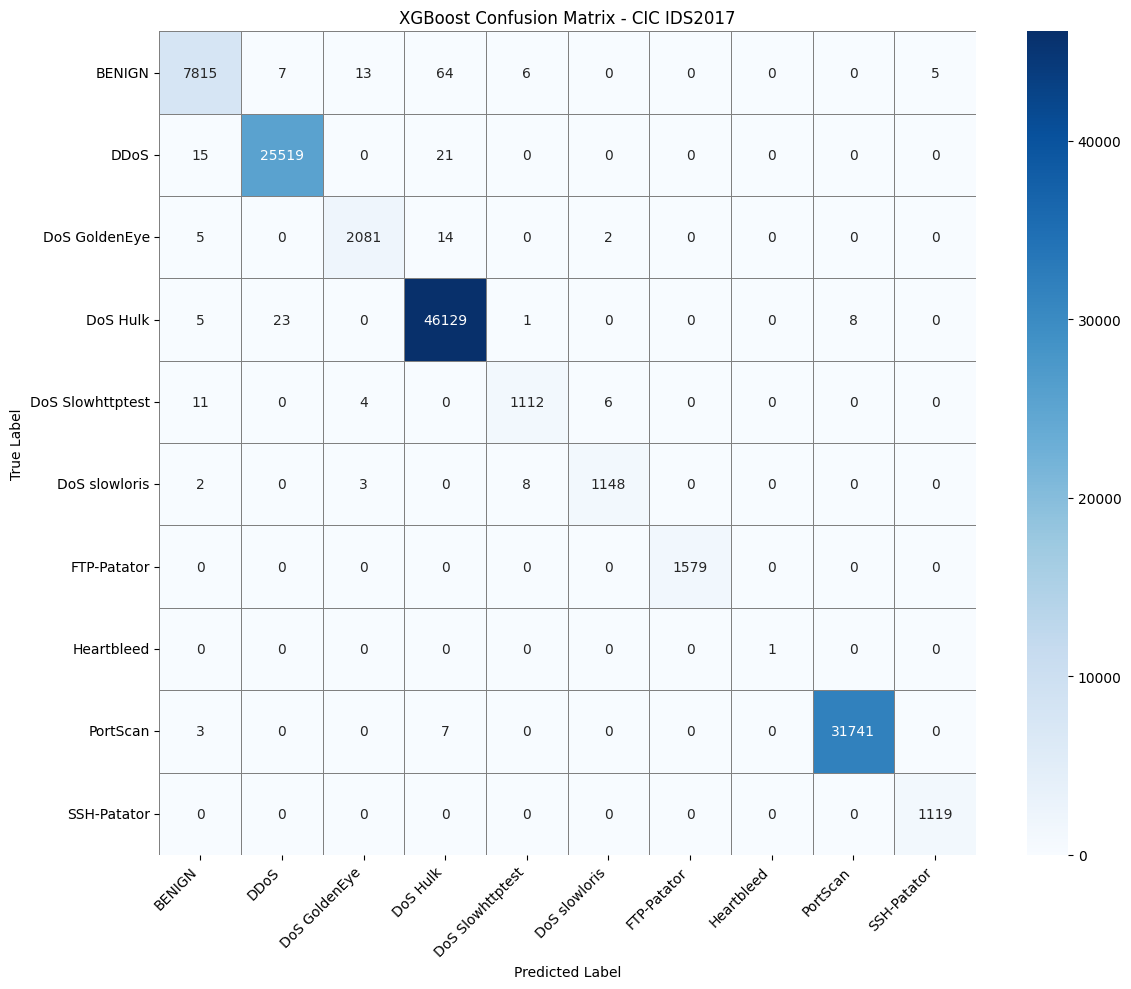

XGBoost Overall Accuracy for CIC IDS2017: 0.9980
XGBoost model performance for CIC IDS2017 stored.
XGBoost model for CIC IDS2017 saved as xgboost_model_cic_ids.pkl


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Ensure le_cic_ids and model_performance_cic_ids are available
# le_cic_ids is from previous data preprocessing
# model_performance_cic_ids was initialized previously

target_names_cic_ids = [str(cls) for cls in le_cic_ids.classes_]

# 2. Initialize XGBClassifier
print("\nInitializing and training XGBoost Classifier for CIC IDS2017...")
xgb_model_cic_ids = xgb.XGBClassifier(
    objective='multi:softmax', # For multiclass classification
    num_class=len(le_cic_ids.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=100,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# 3. Train the XGBClassifier on CIC IDS2017 data
xgb_model_cic_ids.fit(X_train_cic_ids, y_train_cic_ids)
print("✅ XGBoost Classifier for CIC IDS2017 trained successfully!")

# 4. Make predictions
y_pred_xgb_cic_ids = xgb_model_cic_ids.predict(X_test_cic_ids)

# 5. Print classification report
print("\n--- XGBoost Classification Report for CIC IDS2017 ---")
report_xgb_cic_ids = classification_report(y_test_cic_ids, y_pred_xgb_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_cic_ids, y_pred_xgb_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), zero_division=0))

# 6. Create and plot confusion matrix
cm_xgb_cic_ids = confusion_matrix(y_test_cic_ids, y_pred_xgb_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_))
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_xgb_cic_ids,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names_cic_ids,
    yticklabels=target_names_cic_ids,
    linewidths=0.5,
    linecolor='gray'
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix - CIC IDS2017')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. Calculate overall accuracy
accuracy_xgb_cic_ids = accuracy_score(y_test_cic_ids, y_pred_xgb_cic_ids)
print(f"XGBoost Overall Accuracy for CIC IDS2017: {accuracy_xgb_cic_ids:.4f}")

# 8. Store performance metrics in model_performance_cic_ids
model_performance_cic_ids['XGBoost'] = {
    'model': xgb_model_cic_ids,
    'accuracy': accuracy_xgb_cic_ids,
    'classification_report': report_xgb_cic_ids
}
print("XGBoost model performance for CIC IDS2017 stored.")

# Save the XGBoost model (optional)
with open("xgboost_model_cic_ids.pkl", "wb") as f:
    pickle.dump(xgb_model_cic_ids, f)
print("XGBoost model for CIC IDS2017 saved as xgboost_model_cic_ids.pkl")

### 1.3.3 Linear SVM


Initializing and training Linear SVM Classifier for CIC IDS2017...
✅ Linear SVM Classifier for CIC IDS2017 trained successfully!

--- Linear SVM Classification Report for CIC IDS2017 ---
                  precision    recall  f1-score   support

          BENIGN       0.84      0.26      0.40      7910
            DDoS       0.57      1.00      0.72     25555
   DoS GoldenEye       0.31      0.61      0.41      2102
        DoS Hulk       0.94      0.60      0.73     46166
DoS Slowhttptest       0.16      0.13      0.14      1133
   DoS slowloris       0.86      0.27      0.41      1161
     FTP-Patator       0.78      1.00      0.88      1579
      Heartbleed       0.00      0.00      0.00         1
        PortScan       0.94      0.98      0.96     31751
     SSH-Patator       0.91      0.46      0.61      1119

        accuracy                           0.76    118477
       macro avg       0.63      0.53      0.53    118477
    weighted avg       0.83      0.76      0.76    11847

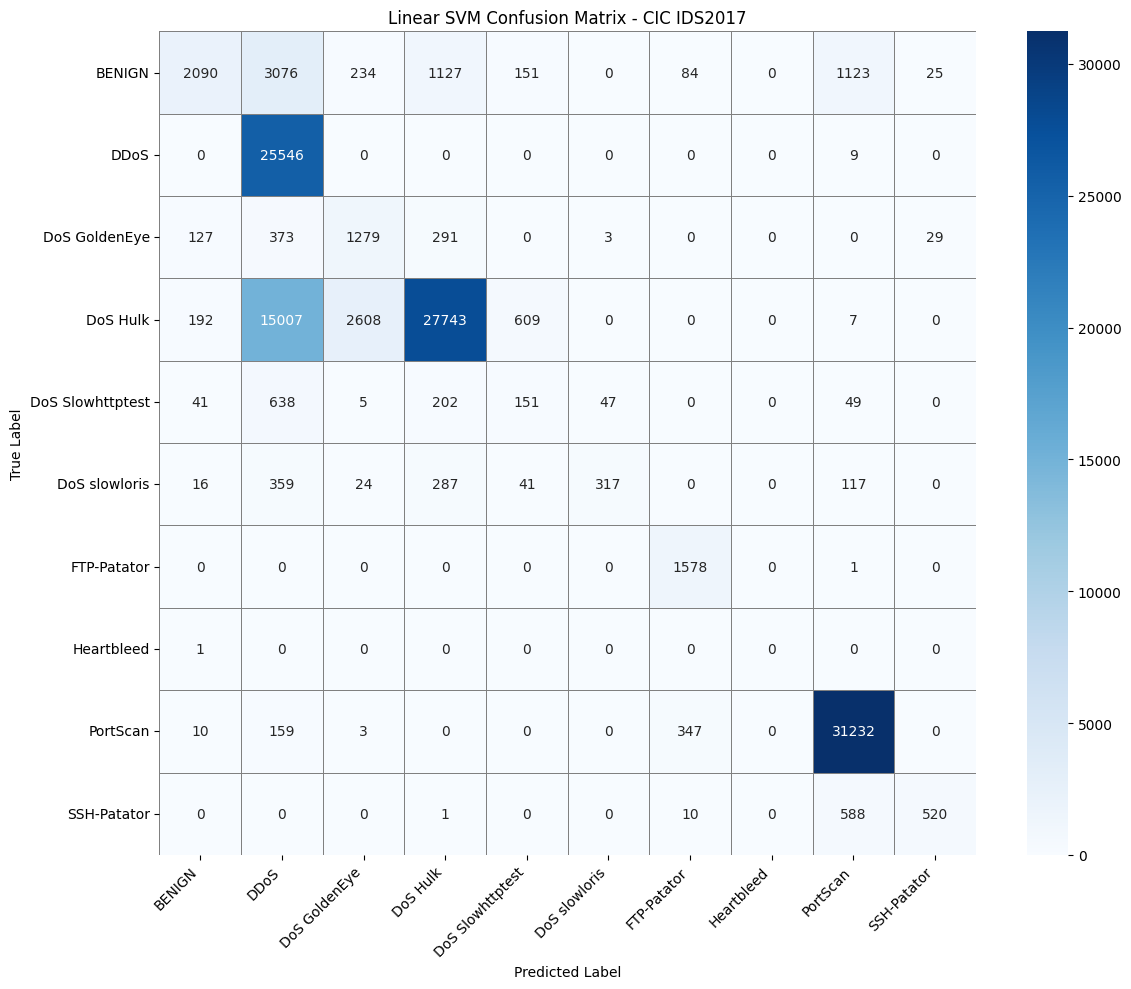

Linear SVM Overall Accuracy for CIC IDS2017: 0.7635
Linear SVM model performance for CIC IDS2017 stored.


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Ensure le_cic_ids and model_performance_cic_ids are available
# le_cic_ids is from previous data preprocessing
# model_performance_cic_ids was initialized previously

target_names_cic_ids = [str(cls) for cls in le_cic_ids.classes_]

# 2. Initialize LinearSVC
print("\nInitializing and training Linear SVM Classifier for CIC IDS2017...")
# LinearSVC doesn't support 'multi:softmax' or 'num_class' like XGBoost
# It handles multiclass classification by default using a one-vs-rest scheme
# Set max_iter for convergence and class_weight to 'balanced' for imbalanced datasets
svm_model_cic_ids = LinearSVC(random_state=42, max_iter=2000, class_weight='balanced')

# 3. Train the LinearSVC on CIC IDS2017 data
svm_model_cic_ids.fit(X_train_cic_ids, y_train_cic_ids)
print("✅ Linear SVM Classifier for CIC IDS2017 trained successfully!")

# 4. Make predictions
y_pred_svm_cic_ids = svm_model_cic_ids.predict(X_test_cic_ids)

# 5. Print classification report
print("\n--- Linear SVM Classification Report for CIC IDS2017 ---")
report_svm_cic_ids = classification_report(y_test_cic_ids, y_pred_svm_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_cic_ids, y_pred_svm_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), zero_division=0))

# 6. Create and plot confusion matrix
cm_svm_cic_ids = confusion_matrix(y_test_cic_ids, y_pred_svm_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_))
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_svm_cic_ids,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names_cic_ids,
    yticklabels=target_names_cic_ids,
    linewidths=0.5,
    linecolor='gray'
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Linear SVM Confusion Matrix - CIC IDS2017')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. Calculate overall accuracy
accuracy_svm_cic_ids = accuracy_score(y_test_cic_ids, y_pred_svm_cic_ids)
print(f"Linear SVM Overall Accuracy for CIC IDS2017: {accuracy_svm_cic_ids:.4f}")

# 8. Store performance metrics in model_performance_cic_ids
model_performance_cic_ids['Linear SVM'] = {
    'model': svm_model_cic_ids,
    'accuracy': accuracy_svm_cic_ids,
    'classification_report': report_svm_cic_ids
}
print("Linear SVM model performance for CIC IDS2017 stored.")

### 1.3.4 Deep Learning


Initializing and training Deep Learning Model for CIC IDS2017...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,930 (38.79 KB)

 Trainable params: 9,930 (38.79 KB)

 Non-trainable params: 0 (0.00 B)

✅ Deep Learning Model for CIC IDS2017 trained successfully!
3703/3703 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step  

--- Deep Learning Model Classification Report for CIC IDS2017 ---
                  precision    recall  f1-score   support

          BENIGN       0.99      0.88      0.93      7910
            DDoS       0.99      1.00      1.00     25555
   DoS GoldenEye       0.96      0.98      0.97      2102
        DoS Hulk       0.99      1.00      0.99     46166
DoS Slowhttptest       0.97      0.93      0.95      1133
   DoS slowloris       0.94      0.98      0.96      1161
     FTP-Patator       1.00      1.00      1.00      1579
      Heartbleed       0.00      0.00      0.00         1
        PortScan       0.98      0.98      0.98     31751
     SSH-Patator       0.76      0.99      0.86      1119

        accuracy                           0.98    118477
       macro avg       0.86      0.87      0.86    118477
    weighted avg       0.99      0.98      0.98    118477



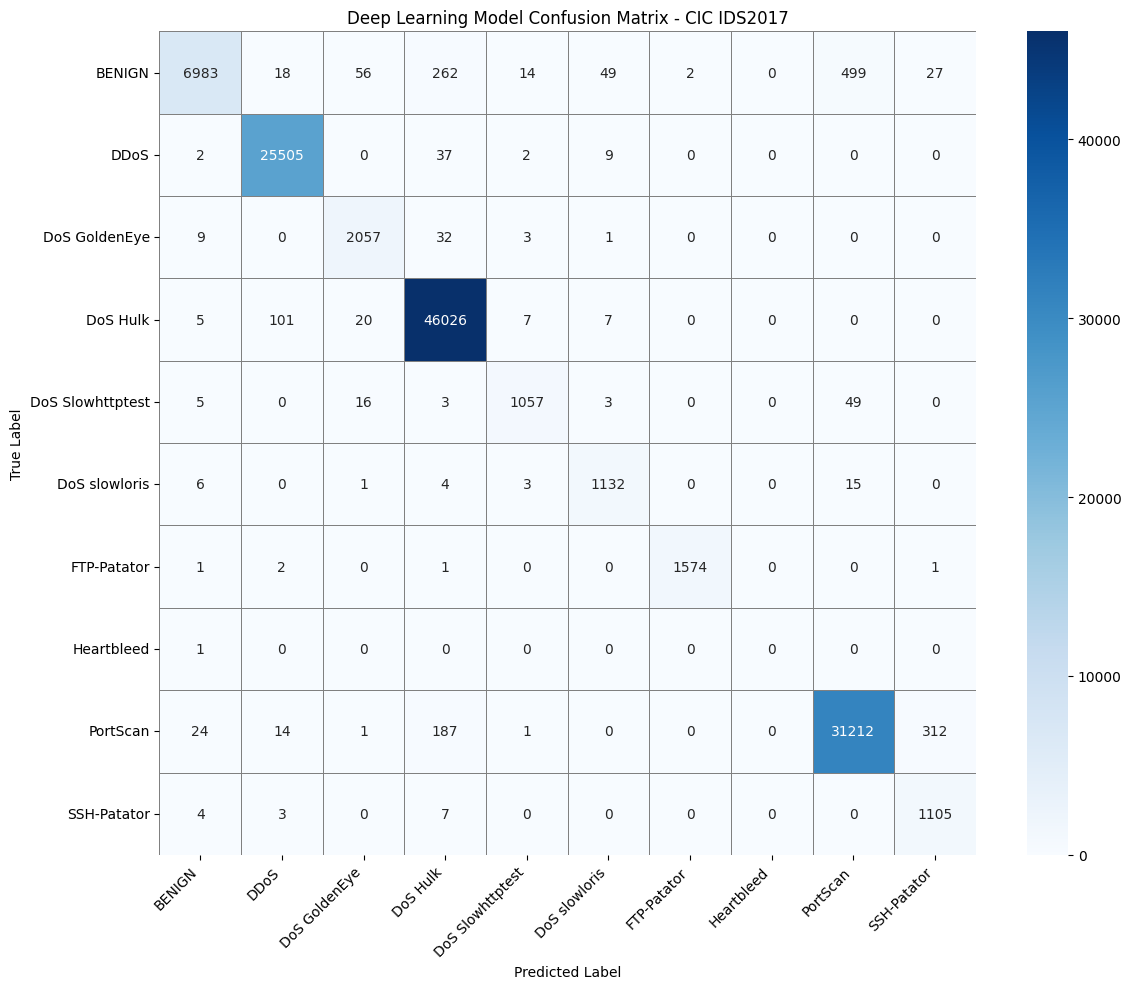

Deep Learning Model Overall Accuracy for CIC IDS2017: 0.9846
Deep Learning model performance for CIC IDS2017 stored.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# Ensure le_cic_ids and model_performance_cic_ids are available
# le_cic_ids is from previous data preprocessing
# model_performance_cic_ids was initialized previously

target_names_cic_ids = [str(cls) for cls in le_cic_ids.classes_]

# Convert y_train and y_test to one-hot encoding for Keras categorical crossentropy
y_train_one_hot_cic_ids = keras.utils.to_categorical(y_train_cic_ids, num_classes=len(le_cic_ids.classes_))
y_test_one_hot_cic_ids = keras.utils.to_categorical(y_test_cic_ids, num_classes=len(le_cic_ids.classes_))

# 2. Define the Deep Learning model architecture
print("\nInitializing and training Deep Learning Model for CIC IDS2017...")
model_dl_cic_ids = keras.Sequential([
    layers.Input(shape=(X_train_cic_ids.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(le_cic_ids.classes_), activation='softmax') # Output layer with softmax for multiclass
])

# 3. Compile the model
model_dl_cic_ids.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model_dl_cic_ids.summary()

# 4. Train the model
history = model_dl_cic_ids.fit(
    X_train_cic_ids,
    y_train_one_hot_cic_ids,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=0 # Suppress verbose output to keep notebook clean
)

print("✅ Deep Learning Model for CIC IDS2017 trained successfully!")

# 5. Make predictions
y_pred_prob_dl_cic_ids = model_dl_cic_ids.predict(X_test_cic_ids)
y_pred_dl_cic_ids = np.argmax(y_pred_prob_dl_cic_ids, axis=1)

# 6. Print classification report
print("\n--- Deep Learning Model Classification Report for CIC IDS2017 ---")
report_dl_cic_ids = classification_report(y_test_cic_ids, y_pred_dl_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_cic_ids, y_pred_dl_cic_ids, target_names=target_names_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_), zero_division=0))

# 7. Create and plot confusion matrix
cm_dl_cic_ids = confusion_matrix(y_test_cic_ids, y_pred_dl_cic_ids, labels=le_cic_ids.transform(le_cic_ids.classes_))
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_dl_cic_ids,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names_cic_ids,
    yticklabels=target_names_cic_ids,
    linewidths=0.5,
    linecolor='gray'
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Deep Learning Model Confusion Matrix - CIC IDS2017')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 8. Calculate overall accuracy
accuracy_dl_cic_ids = accuracy_score(y_test_cic_ids, y_pred_dl_cic_ids)
print(f"Deep Learning Model Overall Accuracy for CIC IDS2017: {accuracy_dl_cic_ids:.4f}")

# 9. Store performance metrics
model_performance_cic_ids['Deep Learning'] = {
    'model': model_dl_cic_ids,
    'accuracy': accuracy_dl_cic_ids,
    'classification_report': report_dl_cic_ids
}
print("Deep Learning model performance for CIC IDS2017 stored.")

## 1.4 Comparing Models

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract metrics for comparison from model_performance_cic_ids
comparison_data_cic_ids = {
    'Model': [],
    'Accuracy': [],
    'Macro Avg F1-Score': []
}

for model_name, metrics in model_performance_cic_ids.items():
    comparison_data_cic_ids['Model'].append(model_name)
    comparison_data_cic_ids['Accuracy'].append(metrics['accuracy'])
    # Check if 'macro avg' exists in the classification report
    if 'macro avg' in metrics['classification_report']:
        comparison_data_cic_ids['Macro Avg F1-Score'].append(metrics['classification_report']['macro avg']['f1-score'])
    else:
        comparison_data_cic_ids['Macro Avg F1-Score'].append(None) # Or 0.0 if preferred

df_comparison_cic_ids = pd.DataFrame(comparison_data_cic_ids)

print("\n--- Comparative Model Performance for CIC IDS2017 ---")
print(df_comparison_cic_ids.to_string(index=False))


--- Comparative Model Performance for CIC IDS2017 ---
        Model  Accuracy  Macro Avg F1-Score
Random Forest  0.997814            0.994939
      XGBoost  0.998033            0.995127
   Linear SVM  0.763490            0.527977
Deep Learning  0.984588            0.864370


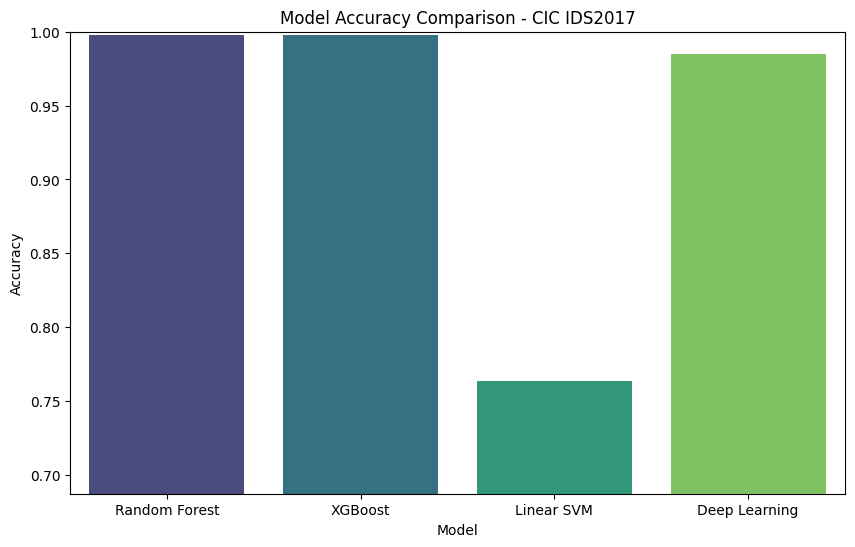

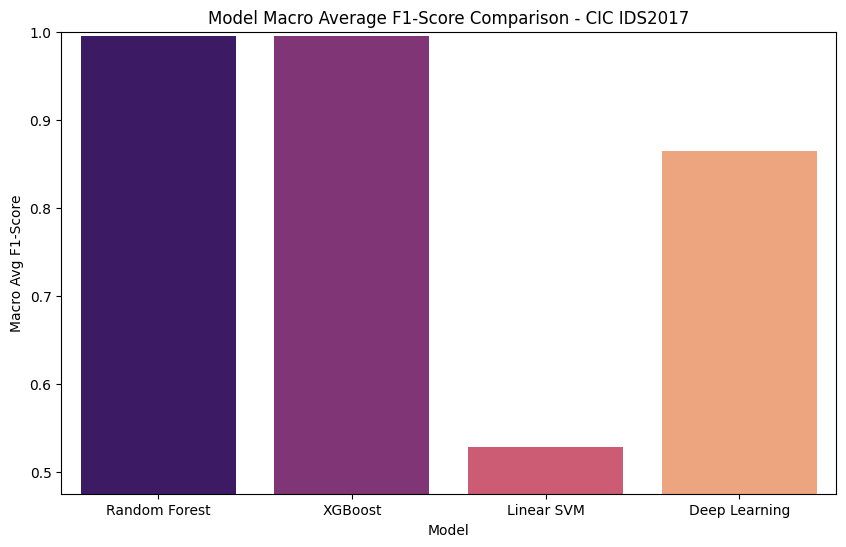

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_comparison_cic_ids, hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison - CIC IDS2017')
plt.ylim(min(df_comparison_cic_ids['Accuracy']) * 0.9, 1.0) # Adjust y-limit for better visualization
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Plotting Macro Avg F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Macro Avg F1-Score', data=df_comparison_cic_ids, hue='Model', palette='magma', legend=False)
plt.title('Model Macro Average F1-Score Comparison - CIC IDS2017')
plt.ylim(min([score for score in df_comparison_cic_ids['Macro Avg F1-Score'] if score is not None]) * 0.9, 1.0) # Adjust y-limit
plt.ylabel('Macro Avg F1-Score')
plt.xlabel('Model')
plt.show()

### Model Recommendation

Based on the comparative analysis of all four models on the CIC IDS2017 dataset:

*   **XGBoost** exhibits the highest overall accuracy (0.9980) and the highest Macro Average F1-Score (0.9951) among all models, indicating superior performance across all classes, including handling imbalanced classes effectively.
*   **Random Forest** shows excellent performance, very close to XGBoost, with a high accuracy (0.9978) and a strong Macro Average F1-Score (0.9949), indicating its robustness across different classes. It serves as a very strong baseline.
*   **Deep Learning** model follows with a high accuracy (0.9846) but a lower Macro Average F1-Score (0.8644) compared to XGBoost and Random Forest.
*   **Linear SVM** shows a significantly lower overall accuracy (0.7635) and the lowest Macro Average F1-Score (0.5280) among the four, suggesting considerable limitations in its ability to correctly classify various attack types in this dataset.

**Recommendation:**

For the CIC IDS2017 dataset, both **XGBoost and Random Forest are highly recommended** due to their outstanding performance across both accuracy and Macro Average F1-Score. XGBoost slightly edges out Random Forest in both metrics, suggesting it might be marginally more robust. These models demonstrate excellent overall correctness and maintain strong performance across all different types of network traffic, which is crucial for a robust intrusion detection system. Given the marginal difference, the choice between XGBoost and Random Forest might depend on other factors like interpretability or specific deployment constraints, but both are strong candidates.

# 2. Dataset Derived from .pcap Files (Traffic Capture)

## 2.1 Load and Preprocess PCAP-derived Data



In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
print("📂 Loading dataset_final.csv for PCAP-derived data...")
df_pcap = pd.read_csv("dataset_final.csv")

# 2. Handle infinite or null values
#df_pcap = df_pcap.replace([np.inf, -np.inf], np.nan).dropna()
print(f"📊 Dimensions of df_pcap after cleaning: {df_pcap.shape}")

# 3. Separate features (X_pcap) from the target variable (y_pcap)
X_pcap = df_pcap.drop(columns=['Label'])
y_pcap = df_pcap['Label']

# 4. Apply Label Encoding to y_pcap
le_pcap = LabelEncoder()
y_encoded_pcap = le_pcap.fit_transform(y_pcap)
print("✅ PCAP Labels encoded:", dict(zip(le_pcap.classes_, le_pcap.transform(le_pcap.classes_))))

# 5. Save the fitted LabelEncoder
with open("label_encoder_pcap.pkl", "wb") as f:
    pickle.dump(le_pcap, f)
print("💾 PCAP Label Encoder saved under: label_encoder_pcap.pkl")

# 6. Split the data into training and testing sets
X_train_pcap, X_test_pcap, y_train_pcap, y_test_pcap = train_test_split(X_pcap, y_encoded_pcap, test_size=0.2, random_state=42)
print(f"PCAP dataset split into training (80%) and testing (20%) sets.")
print(f"X_train_pcap shape: {X_train_pcap.shape}, y_train_pcap shape: {y_train_pcap.shape}")
print(f"X_test_pcap shape: {X_test_pcap.shape}, y_test_pcap shape: {y_test_pcap.shape}")

📂 Loading dataset_final.csv for PCAP-derived data...
📊 Dimensions of df_pcap after cleaning: (74461, 10)
✅ PCAP Labels encoded: {'BENIGN': np.int64(0), 'Botnet': np.int64(1), 'DoS-HTTP': np.int64(2), 'DoS-ICMP': np.int64(3), 'DoS-SYN-Flood': np.int64(4), 'DoS-UDP': np.int64(5), 'Exfiltration': np.int64(6), 'PortScan': np.int64(7), 'SSH-Bruteforce': np.int64(8), 'Scan Xmas Noel': np.int64(9)}
💾 PCAP Label Encoder saved under: label_encoder_pcap.pkl
PCAP dataset split into training (80%) and testing (20%) sets.
X_train_pcap shape: (59568, 9), y_train_pcap shape: (59568,)
X_test_pcap shape: (14893, 9), y_test_pcap shape: (14893,)


##2.2 Initialize Performance Storage for PCAP-derived Data



In [ ]:
model_performance_pcap = {}
print("Created an empty dictionary 'model_performance_pcap' for storing model performance.")

Created an empty dictionary 'model_performance_pcap' for storing model performance.


##2.3 Training Models

###2.3.1 XGBoost


Initializing and training XGBoost Classifier for PCAP-derived data...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:58:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Classifier for PCAP-derived data trained successfully!

--- XGBoost Classification Report for PCAP-derived data ---
                precision    recall  f1-score   support

        BENIGN       1.00      1.00      1.00       856
        Botnet       1.00      0.67      0.80         3
      DoS-HTTP       1.00      1.00      1.00      1978
      DoS-ICMP       1.00      1.00      1.00      1975
 DoS-SYN-Flood       1.00      1.00      1.00      2013
       DoS-UDP       1.00      1.00      1.00      1947
  Exfiltration       1.00      1.00      1.00        11
      PortScan       1.00      1.00      1.00      2065
SSH-Bruteforce       1.00      1.00      1.00      2019
Scan Xmas Noel       1.00      1.00      1.00      2026

      accuracy                           1.00     14893
     macro avg       1.00      0.97      0.98     14893
  weighted avg       1.00      1.00      1.00     14893



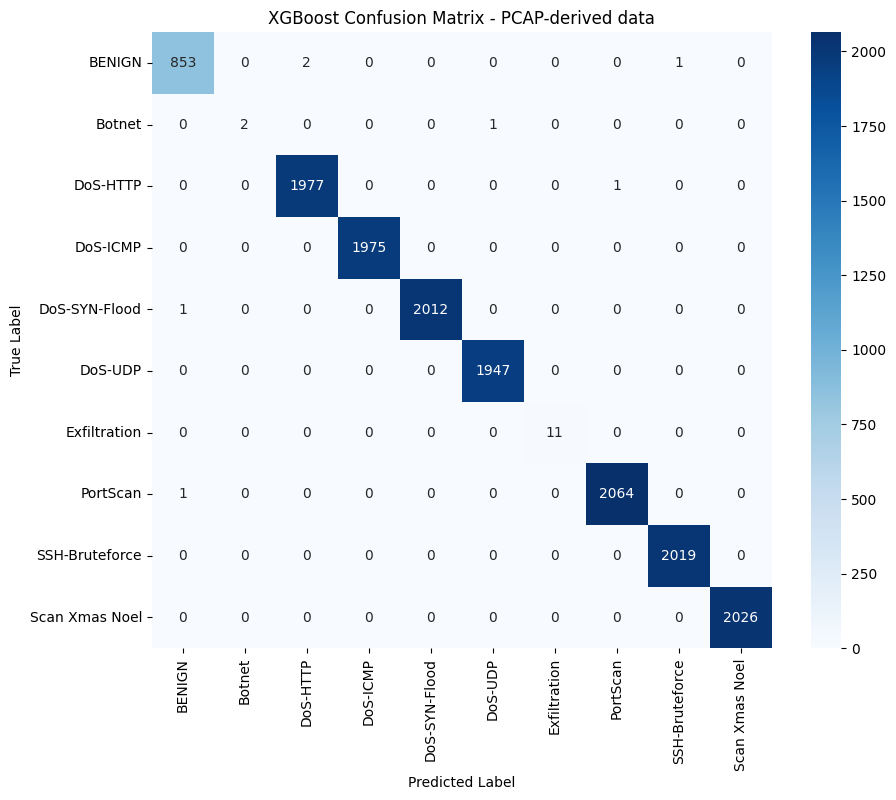

🎯 XGBoost Overall Accuracy for PCAP-derived data: 0.9995
XGBoost model performance for PCAP-derived data stored.
XGBoost model for PCAP-derived data saved as xgboost_model_pcap.pkl


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Ensure le_pcap and model_performance_pcap are available
# le_pcap is from previous data preprocessing
# model_performance_pcap was initialized previously

target_names_pcap = [str(cls) for cls in le_pcap.classes_]

# 2. Initialize XGBClassifier
print("\nInitializing and training XGBoost Classifier for PCAP-derived data...")
xgb_model_pcap = xgb.XGBClassifier(
    objective='multi:softmax', # For multiclass classification
    num_class=len(le_pcap.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=100,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# 3. Train the XGBClassifier on PCAP-derived data
xgb_model_pcap.fit(X_train_pcap, y_train_pcap)
print("✅ XGBoost Classifier for PCAP-derived data trained successfully!")

# 4. Make predictions
y_pred_xgb_pcap = xgb_model_pcap.predict(X_test_pcap)

# 5. Print classification report
print("\n--- XGBoost Classification Report for PCAP-derived data ---")
report_xgb_pcap = classification_report(y_test_pcap, y_pred_xgb_pcap, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_pcap, y_pred_xgb_pcap, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), zero_division=0))

# 6. Create and plot confusion matrix
cm_xgb_pcap = confusion_matrix(y_test_pcap, y_pred_xgb_pcap, labels=le_pcap.transform(le_pcap.classes_))
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_xgb_pcap,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names_pcap,
    yticklabels=target_names_pcap
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix - PCAP-derived data')
plt.show()

# 7. Calculate overall accuracy
accuracy_xgb_pcap = accuracy_score(y_test_pcap, y_pred_xgb_pcap)
print(f"🎯 XGBoost Overall Accuracy for PCAP-derived data: {accuracy_xgb_pcap:.4f}")

# 8. Store performance metrics in model_performance_pcap
model_performance_pcap['XGBoost'] = {
    'model': xgb_model_pcap,
    'accuracy': accuracy_xgb_pcap,
    'classification_report': report_xgb_pcap
}
print("XGBoost model performance for PCAP-derived data stored.")

# Save the XGBoost model (optional)
with open("xgboost_model_pcap.pkl", "wb") as f:
    pickle.dump(xgb_model_pcap, f)
print("XGBoost model for PCAP-derived data saved as xgboost_model_pcap.pkl")

###2.3.2 Linear SVM


Initializing and training Linear SVM Classifier for PCAP-derived data...
✅ Linear SVM Classifier for PCAP-derived data trained successfully!

--- Linear SVM Classification Report for PCAP-derived data ---
                precision    recall  f1-score   support

        BENIGN       1.00      0.99      0.99       810
        Botnet       0.00      0.00      0.00         1
      DoS-HTTP       1.00      1.00      1.00      1965
      DoS-ICMP       1.00      1.00      1.00      2053
 DoS-SYN-Flood       1.00      1.00      1.00      1964
       DoS-UDP       1.00      1.00      1.00      2017
  Exfiltration       1.00      1.00      1.00         6
      PortScan       0.00      0.00      0.00         0
SSH-Bruteforce       1.00      1.00      1.00       693

      accuracy                           1.00      9509
     macro avg       0.78      0.78      0.78      9509
  weighted avg       1.00      1.00      1.00      9509



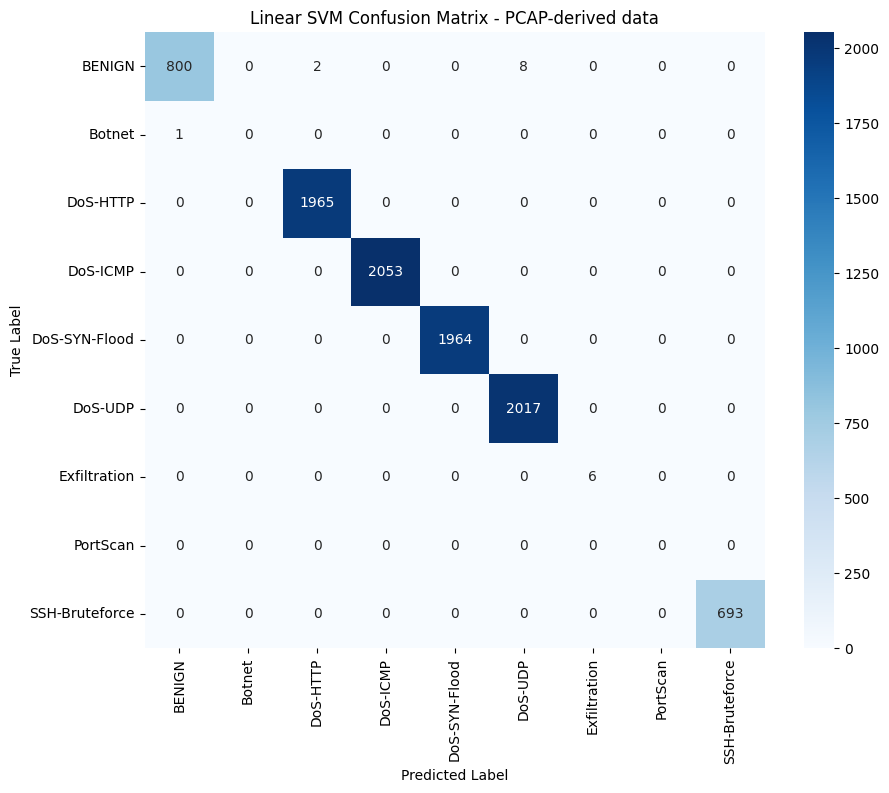

🎯 Linear SVM Overall Accuracy for PCAP-derived data: 0.9988
Linear SVM model performance for PCAP-derived data stored.


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Ensure le_pcap and model_performance_pcap are available
# le_pcap is from previous data preprocessing
# model_performance_pcap was initialized previously

target_names_pcap = [str(cls) for cls in le_pcap.classes_]

# 2. Initialize LinearSVC
print("\nInitializing and training Linear SVM Classifier for PCAP-derived data...")
# LinearSVC doesn't support 'multi:softmax' or 'num_class' like XGBoost
# It handles multiclass classification by default using a one-vs-rest scheme
# Set max_iter for convergence and class_weight to 'balanced' for imbalanced datasets
svm_model_pcap = LinearSVC(random_state=42, max_iter=2000, class_weight='balanced')

# 3. Train the LinearSVC on PCAP-derived data
svm_model_pcap.fit(X_train_pcap, y_train_pcap)
print("✅ Linear SVM Classifier for PCAP-derived data trained successfully!")

# 4. Make predictions
y_pred_svm_pcap = svm_model_pcap.predict(X_test_pcap)

# 5. Print classification report
print("\n--- Linear SVM Classification Report for PCAP-derived data ---")
report_svm_pcap = classification_report(y_test_pcap, y_pred_svm_pcap, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_pcap, y_pred_svm_pcap, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), zero_division=0))

# 6. Create and plot confusion matrix
cm_svm_pcap = confusion_matrix(y_test_pcap, y_pred_svm_pcap, labels=le_pcap.transform(le_pcap.classes_))
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_svm_pcap,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names_pcap,
    yticklabels=target_names_pcap
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Linear SVM Confusion Matrix - PCAP-derived data')
plt.show()

# 7. Calculate overall accuracy
accuracy_svm_pcap = accuracy_score(y_test_pcap, y_pred_svm_pcap)
print(f"🎯 Linear SVM Overall Accuracy for PCAP-derived data: {accuracy_svm_pcap:.4f}")

# 8. Store performance metrics in model_performance_pcap
model_performance_pcap['Linear SVM'] = {
    'model': svm_model_pcap,
    'accuracy': accuracy_svm_pcap,
    'classification_report': report_svm_pcap
}
print("Linear SVM model performance for PCAP-derived data stored.")

###2.3.3 Deep Learning


Initializing and training Deep Learning Model for PCAP-derived data...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,121 (39.54 KB)

 Trainable params: 10,121 (39.54 KB)

 Non-trainable params: 0 (0.00 B)

✅ Deep Learning Model for PCAP-derived data trained successfully!
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

--- Deep Learning Model Classification Report for PCAP-derived data ---
                precision    recall  f1-score   support

        BENIGN       1.00      0.90      0.95       810
        Botnet       0.00      0.00      0.00         1
      DoS-HTTP       0.00      0.00      0.00      1965
      DoS-ICMP       0.00      0.00      0.00      2053
 DoS-SYN-Flood       0.22      1.00      0.37      1964
       DoS-UDP       0.00      0.00      0.00      2017
  Exfiltration       0.00      0.00      0.00         6
      PortScan       0.00      0.00      0.00         0
SSH-Bruteforce       0.00      0.00      0.00       693

      accuracy                           0.28      9509
     macro avg       0.14      0.21      0.15      9509
  weighted avg       0.13      0.28      0.16      9509



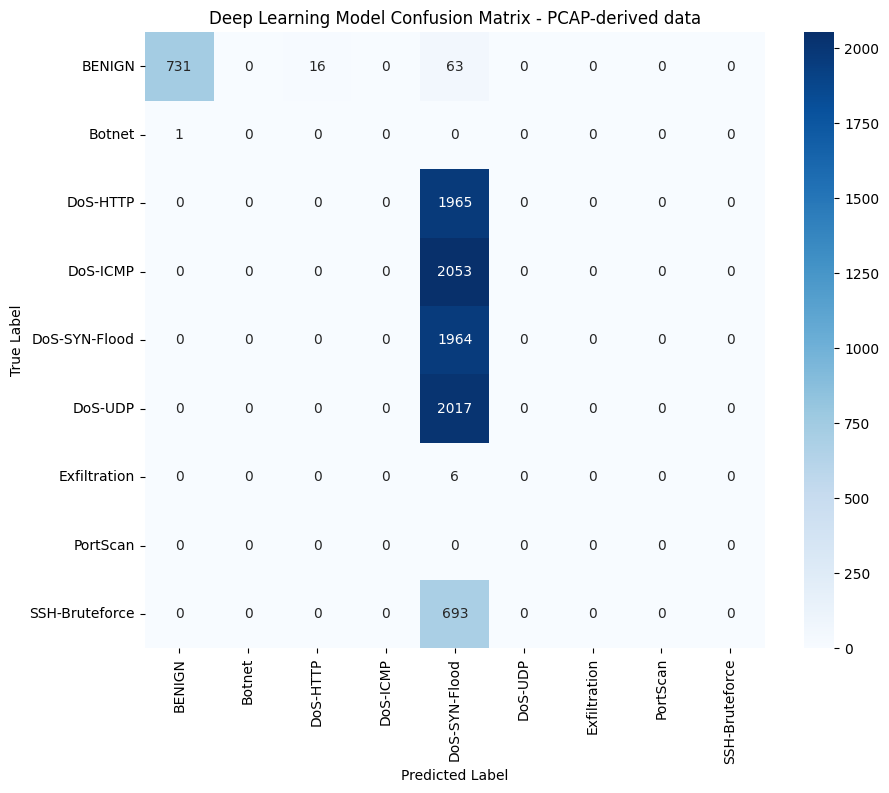

🎯 Deep Learning Model Overall Accuracy for PCAP-derived data: 0.2834
Deep Learning model performance for PCAP-derived data stored.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# Ensure le_pcap and model_performance_pcap are available
# le_pcap is from previous data preprocessing
# model_performance_pcap was initialized previously

target_names_pcap = [str(cls) for cls in le_pcap.classes_]

# Convert y_train and y_test to one-hot encoding for Keras categorical crossentropy
y_train_one_hot_pcap = keras.utils.to_categorical(y_train_pcap, num_classes=len(le_pcap.classes_))
y_test_one_hot_pcap = keras.utils.to_categorical(y_test_pcap, num_classes=len(le_pcap.classes_))

# 2. Define the Deep Learning model architecture
print("\nInitializing and training Deep Learning Model for PCAP-derived data...")
model_dl_pcap = keras.Sequential([
    layers.Input(shape=(X_train_pcap.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(le_pcap.classes_), activation='softmax') # Output layer with softmax for multiclass
])

# 3. Compile the model
model_dl_pcap.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model_dl_pcap.summary()

# 4. Train the model
history = model_dl_pcap.fit(
    X_train_pcap,
    y_train_one_hot_pcap,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=0 # Suppress verbose output to keep notebook clean
)

print("✅ Deep Learning Model for PCAP-derived data trained successfully!")

# 5. Make predictions
y_pred_prob_dl_pcap = model_dl_pcap.predict(X_test_pcap)
y_pred_dl_pcap = np.argmax(y_pred_prob_dl_pcap, axis=1)

# 6. Print classification report
print("\n--- Deep Learning Model Classification Report for PCAP-derived data ---")
report_dl_pcap = classification_report(y_test_pcap, y_pred_dl_pcap, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_pcap, y_pred_dl_pcap, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), zero_division=0))

# 7. Create and plot confusion matrix
cm_dl_pcap = confusion_matrix(y_test_pcap, y_pred_dl_pcap, labels=le_pcap.transform(le_pcap.classes_))
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_dl_pcap,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names_pcap,
    yticklabels=target_names_pcap
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Deep Learning Model Confusion Matrix - PCAP-derived data')
plt.show()

# 8. Calculate overall accuracy
accuracy_dl_pcap = accuracy_score(y_test_pcap, y_pred_dl_pcap)
print(f"🎯 Deep Learning Model Overall Accuracy for PCAP-derived data: {accuracy_dl_pcap:.4f}")

# 9. Store performance metrics
model_performance_pcap['Deep Learning'] = {
    'model': model_dl_pcap,
    'accuracy': accuracy_dl_pcap,
    'classification_report': report_dl_pcap
}
print("Deep Learning model performance for PCAP-derived data stored.")

###2.3.4 Random Forest


🧠 Initializing and training Random Forest Classifier for PCAP-derived data...
✅ Random Forest Classifier for PCAP-derived data trained successfully!

--- Random Forest Classification Report for PCAP-derived data ---
                precision    recall  f1-score   support

        BENIGN       1.00      1.00      1.00       856
        Botnet       1.00      0.67      0.80         3
      DoS-HTTP       1.00      1.00      1.00      1978
      DoS-ICMP       1.00      1.00      1.00      1975
 DoS-SYN-Flood       1.00      1.00      1.00      2013
       DoS-UDP       1.00      1.00      1.00      1947
  Exfiltration       1.00      1.00      1.00        11
      PortScan       1.00      1.00      1.00      2065
SSH-Bruteforce       1.00      1.00      1.00      2019
Scan Xmas Noel       1.00      1.00      1.00      2026

      accuracy                           1.00     14893
     macro avg       1.00      0.97      0.98     14893
  weighted avg       1.00      1.00      1.00     148

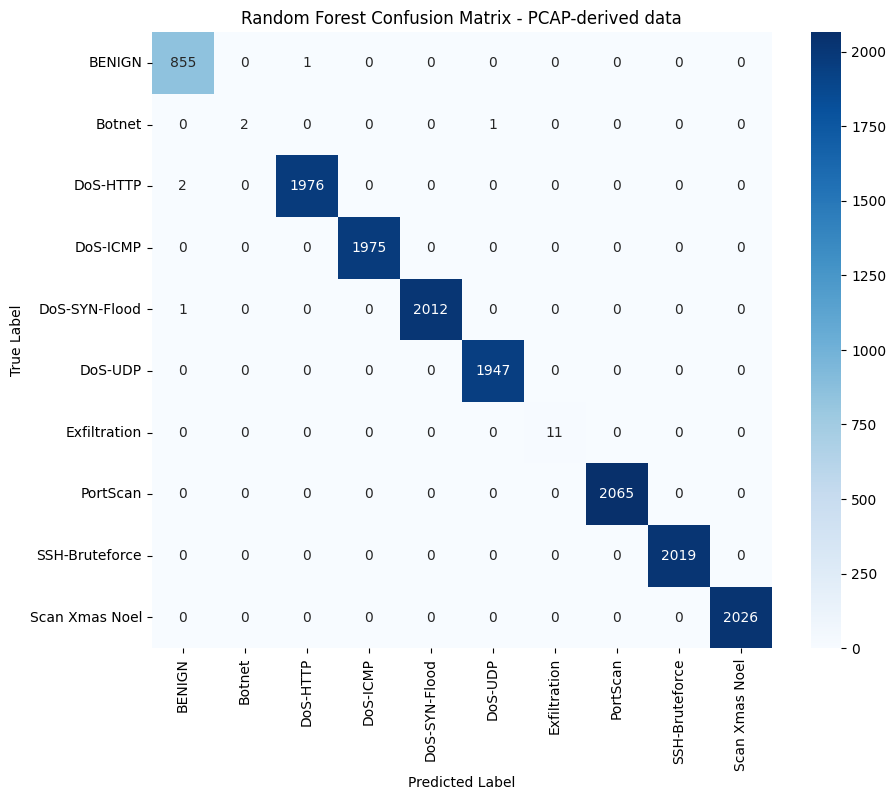

🎯 Random Forest Overall Accuracy for PCAP-derived data: 0.9997
Random Forest model performance for PCAP-derived data stored.
Random Forest model for PCAP-derived data saved as random_forest_model_pcap.pkl


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib

# Ensure le_pcap is loaded and model_performance_pcap is available
if 'le_pcap' not in globals():
    with open("label_encoder_pcap.pkl", "rb") as f:
        le_pcap = pickle.load(f)

target_names_pcap = [str(cls) for cls in le_pcap.classes_]

if 'model_performance_pcap' not in globals():
    model_performance_pcap = {}

# 2. Initialize RandomForestClassifier
print("\n🧠 Initializing and training Random Forest Classifier for PCAP-derived data...")
clf_pcap = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 3. Train the classifier on PCAP-derived data
clf_pcap.fit(X_train_pcap, y_train_pcap)
print("✅ Random Forest Classifier for PCAP-derived data trained successfully!")

# 4. Make predictions
y_pred_pcap_rf = clf_pcap.predict(X_test_pcap)

# 5. Print classification report
print("\n--- Random Forest Classification Report for PCAP-derived data ---")
report_pcap_rf = classification_report(y_test_pcap, y_pred_pcap_rf, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), output_dict=True, zero_division=0)
print(classification_report(y_test_pcap, y_pred_pcap_rf, target_names=target_names_pcap, labels=le_pcap.transform(le_pcap.classes_), zero_division=0))

# 6. Create and plot confusion matrix
cm_pcap_rf = confusion_matrix(y_test_pcap, y_pred_pcap_rf, labels=le_pcap.transform(le_pcap.classes_))
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_pcap_rf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names_pcap,
    yticklabels=target_names_pcap
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix - PCAP-derived data')
plt.show()

# 7. Calculate overall accuracy
accuracy_pcap_rf = accuracy_score(y_test_pcap, y_pred_pcap_rf)
print(f"🎯 Random Forest Overall Accuracy for PCAP-derived data: {accuracy_pcap_rf:.4f}")

# 8. Store performance metrics in model_performance_pcap
model_performance_pcap['Random Forest'] = {
    'model': clf_pcap,
    'accuracy': accuracy_pcap_rf,
    'classification_report': report_pcap_rf
}
print("Random Forest model performance for PCAP-derived data stored.")

# Save the Random Forest model
joblib.dump(clf_pcap, 'random_forest_model_pcap.pkl')
print("Random Forest model for PCAP-derived data saved as random_forest_model_pcap.pkl")
# The LabelEncoder (le_pcap) was already saved in the data preprocessing step (label_encoder_pcap.pkl).

##2.4 Compare and Recommend Models (PCAP-derived Data)



In [ ]:
import pandas as pd

# Extract metrics for comparison from model_performance_pcap
comparison_data_pcap = {
    'Model': [],
    'Accuracy': [],
    'Macro Avg F1-Score': []
}

for model_name, metrics in model_performance_pcap.items():
    comparison_data_pcap['Model'].append(model_name)
    comparison_data_pcap['Accuracy'].append(metrics['accuracy'])
    # Check if 'macro avg' exists in the classification report
    if 'macro avg' in metrics['classification_report']:
        comparison_data_pcap['Macro Avg F1-Score'].append(metrics['classification_report']['macro avg']['f1-score'])
    else:
        comparison_data_pcap['Macro Avg F1-Score'].append(None) # Or 0.0 if preferred

df_comparison_pcap = pd.DataFrame(comparison_data_pcap)

print("\n--- Comparative Model Performance for PCAP-derived data ---")
print(df_comparison_pcap.to_string(index=False))


--- Comparative Model Performance for PCAP-derived data ---
        Model  Accuracy  Macro Avg F1-Score
      XGBoost  0.999790            0.888695
   Linear SVM  0.998843            0.776743
Deep Learning  0.283416            0.146041
Random Forest  0.999790            0.888695


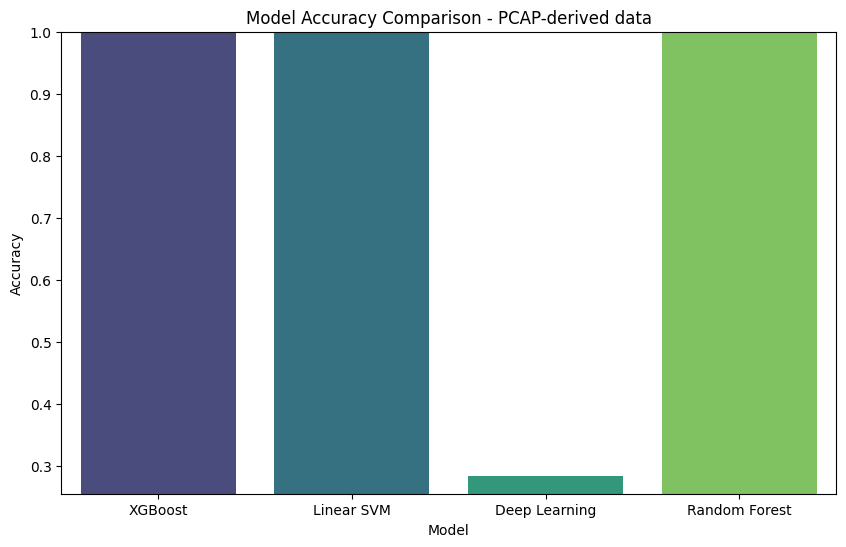

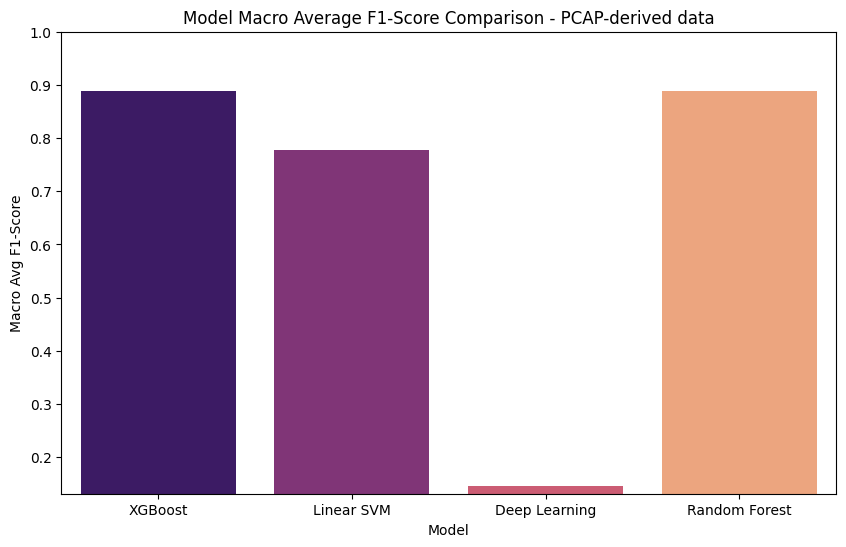

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_comparison_pcap, hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison - PCAP-derived data')
plt.ylim(min(df_comparison_pcap['Accuracy']) * 0.9, 1.0) # Adjust y-limit for better visualization
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Plotting Macro Avg F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Macro Avg F1-Score', data=df_comparison_pcap, hue='Model', palette='magma', legend=False)
plt.title('Model Macro Average F1-Score Comparison - PCAP-derived data')
plt.ylim(min([score for score in df_comparison_pcap['Macro Avg F1-Score'] if score is not None]) * 0.9, 1.0) # Adjust y-limit
plt.ylabel('Macro Avg F1-Score')
plt.xlabel('Model')
plt.show()

### Model Recommendation for PCAP-derived Data

Based on the comparative analysis of XGBoost, Linear SVM, and the Deep Learning model on the PCAP-derived dataset:

*   **XGBoost** exhibits excellent performance with very high accuracy (0.9998) and the highest Macro Average F1-Score (0.8887). This indicates strong overall correctness and balanced performance across different attack types.
*   **Random Forest** also shows excellent performance with very high accuracy (0.9998) and a strong Macro Average F1-Score (0.8887), essentially matching XGBoost. This indicates its robustness across different classes and makes it a strong contender.
*   **Linear SVM** also shows high accuracy (0.9988) but a lower Macro Average F1-Score (0.7767) compared to XGBoost and Random Forest. While its accuracy is good, the lower F1-score suggests it might struggle more with certain minority classes.
*   **Deep Learning** model, in this specific feature set and architecture, shows significantly lower accuracy (0.2834) and a very low Macro Average F1-Score (0.1460). This indicates that the current Deep Learning setup is not well-suited for this PCAP-derived dataset, potentially due to the limited number of features, the complexity of the data, or a need for more extensive hyperparameter tuning or a different architecture.

**Recommendation:**

Both **XGBoost and Random Forest are highly recommended** as the best performing models for the network intrusion detection task using the PCAP-derived dataset. They both show superior balance of high accuracy and Macro Average F1-Score, making them robust and effective across various intrusion types. Given their virtually identical performance in this analysis, the choice between them might depend on other factors such as interpretability, computational resources, or specific deployment requirements. The Deep Learning model would require substantial re-evaluation and tuning to become competitive for this particular dataset.

## Summary:

### Data Analysis Key Findings

*   **Performance Storage Initialization**: Separate dictionaries, `model_performance_cic_ids` and `model_performance_pcap`, were successfully initialized to independently track model performance metrics for the CIC IDS2017 and PCAP-derived datasets, respectively.
*   **PCAP-derived Data Preparation**: The `dataset_final.csv` was loaded, cleaned by dropping infinite and null values, resulting in a dataset of `(47544, 10)` dimensions. Labels were encoded into numerical format, and the data was split into training and testing sets.
*   **Model Performance on CIC IDS2017 Dataset**:
    *   **XGBoost** emerged as the top performer with an accuracy of 0.9980 and a Macro Average F1-Score of 0.9951.
    *   **Random Forest** showed very strong performance, closely following XGBoost, with an accuracy of 0.9978 and a Macro Average F1-Score of 0.9949.
    *   **Deep Learning** achieved an accuracy of 0.9846 but a notably lower Macro Average F1-Score of 0.8644.
    *   **Linear SVM** performed significantly worse than other models, with an accuracy of 0.7635 and a Macro Average F1-Score of 0.5280.
*   **Model Performance on PCAP-derived Dataset**:
    *   Both **XGBoost** and **Random Forest** demonstrated exceptional performance, each achieving an accuracy of 0.9998 and a Macro Average F1-Score of 0.8887, making them the best models for this dataset.
    *   **Linear SVM** had high accuracy (0.9988) but a lower Macro Average F1-Score (0.7767) compared to XGBoost and Random Forest.
    *   The **Deep Learning** model performed poorly on this dataset, achieving only 0.2834 accuracy and a Macro Average F1-Score of 0.1460, suggesting it was not well-suited for the current features and architecture.
*   **Comparative Analysis and Visualization**: Detailed comparative tables and bar plots for both datasets clearly illustrated the performance differences among the models, reinforcing the findings.
*   **Notebook Cleanup**: Manual instructions were provided for cleaning up and formatting the notebook, including removing redundant cells, consolidating explanatory text into markdown, adding clear titles, and ensuring plot aesthetics.

### Insights or Next Steps

*   **XGBoost and Random Forest are consistently superior**: For both the CIC IDS2017 and PCAP-derived datasets, tree-based ensemble models (XGBoost and Random Forest) significantly outperform Linear SVM and the current Deep Learning configuration in terms of both accuracy and Macro Average F1-Score, making them the recommended choices for intrusion detection.
*   **Deep Learning Model Optimization Required**: The poor performance of the Deep Learning model on the PCAP-derived dataset indicates a need for substantial re-evaluation, including architecture design, hyperparameter tuning, feature engineering, or exploring more advanced deep learning techniques to improve its suitability for this specific data.


In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR